# NLP for Emotion Classification

In [627]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading text-based datasets into pandas

In [628]:
df_train = pd.read_csv('/content/drive/MyDrive/Kaggle-Datasets/Emotions-NLP/train.txt', sep=";", header=None)
df_train.columns = ["Message", "Emotion"]
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle-Datasets/Emotions-NLP/test.txt', sep=";", header=None)
df_test.columns = ["Message", "Emotion"]
df_val = pd.read_csv('/content/drive/MyDrive/Kaggle-Datasets/Emotions-NLP/val.txt', sep=";", header=None)
df_val.columns = ["Message", "Emotion"]

## Exploratory Data Analysis (EDA)

In [629]:
df_train.describe()

,Message,Emotion
count,16000,16000
unique,15969,6
top,i could feel myself hit this strange foggy wall,joy
freq,2,5362


In [630]:
df_train.loc[df_train['Message'] == 'i feel so weird about it',['Message','Emotion']]

# Here we notice that 2 records with the same message have 2 different emotions in training dataset

,Message,Emotion
7669,i feel so weird about it,fear
12562,i feel so weird about it,surprise


In [631]:
df_test.describe()

,Message,Emotion
count,2000,2000
unique,2000,6
top,i feel like im a pathetic little desperation,joy
freq,1,695


In [632]:
df_val.describe()

,Message,Emotion
count,2000,2000
unique,1998,6
top,i have had several new members tell me how com...,joy
freq,2,704


In [633]:
df_val.loc[df_val['Message'] == 'i feel so tortured by it',['Message','Emotion']]

# We also found 2 records with the same message and 2 different emotions in validation dataset

,Message,Emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [634]:
df_train.groupby('Emotion').describe()

Message                                                               
           count unique                                                top freq
Emotion                                                                        
anger       2159   2159  i can never fall in love with anyone because m...    1
fear        1937   1937  i only have to think about a high school exper...    1
joy         5362   5361  i feel more adventurous willing to take risks ...    2
love        1304   1304  i feel that language is nothing at all cheer u...    1
sadness     4666   4666  i hold it for a day my arm will feel numb and ...    1
surprise     572    572  i admit to feeling bitterly surprised at how r...    1

In [635]:
df_test.groupby('Emotion').describe()

Message                                                               
           count unique                                                top freq
Emotion                                                                        
anger        275    275  i feel so disgusted when i see blood and feel ...    1
fear         224    224  i feel uncomfortable since i have a smaller ri...    1
joy          695    695        i wasn t feeling well but no specific issue    1
love         159    159  i try my best to love on them shed some light ...    1
sadness      581    581       i feel like im a pathetic little desperation    1
surprise      66     66  i would look up at the sky scrapers and feel a...    1

In [636]:
df_val.groupby('Emotion').describe()

Message                                                               
           count unique                                                top freq
Emotion                                                                        
anger        275    275  i am feeling too grouchy to be properly penite...    1
fear         212    212                         i feel doubtful and afraid    1
joy          704    704  i feel ok with nothing sexually or whatsoever ...    1
love         178    178  i was just telling you how i feel about you an...    1
sadness      550    550  i posted i think it was about feeling sorta sh...    1
surprise      81     81                               i am feeling amazing    1

In [637]:
df_train.head()

,Message,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [638]:
df_test.head()

,Message,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
# Convert Emotions (target) into numerical variables using Label Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['Emotion'] = encoder.fit_transform(df_train['Emotion'])
df_test['Emotion'] = encoder.fit_transform(df_test['Emotion'])
df_val['Emotion'] = encoder.fit_transform(df_val['Emotion'])

In [639]:
df_train['Message length'] = df_train['Message'].apply(lambda x : len(x))
df_test['Message length'] = df_test['Message'].apply(lambda x : len(x))
df_val['Message length'] = df_val['Message'].apply(lambda x : len(x))

In [640]:
df_train.head()

,Message,Emotion,Message length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [ ]:
palette = {0:"C0",1:"C1",2:"C2",3:"C3",4:"C4",5:"C5"} #0. Anger, 1. Fear, 2. Joy, 3. Love, 4. Sadness, 5. Surprise

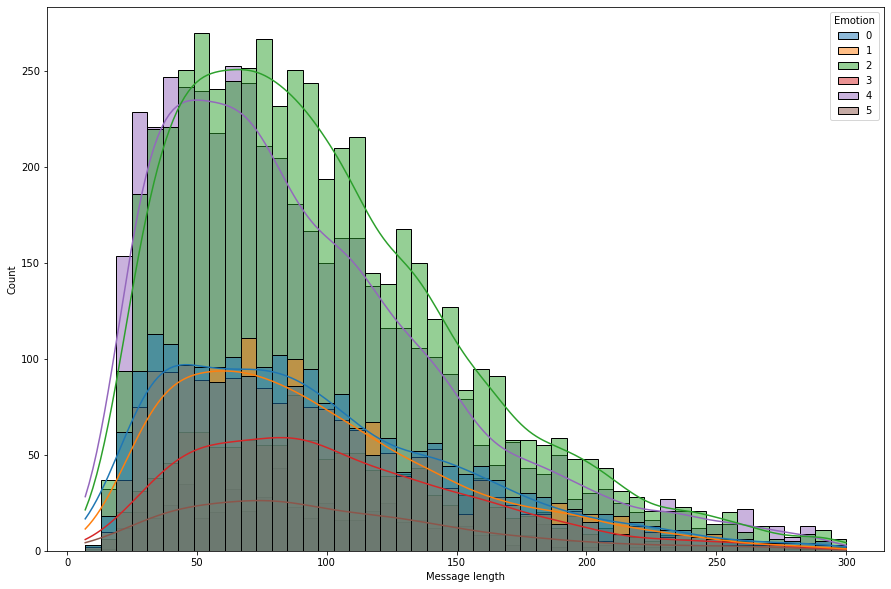

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_train, hue='Emotion', x='Message length', stat='count', multiple='layer', palette=palette,kde=True)

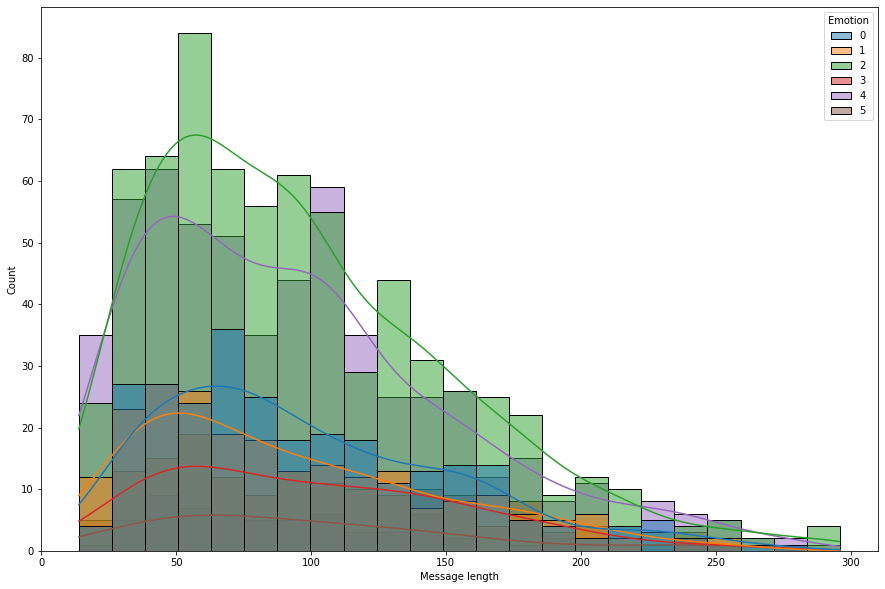

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_test, hue='Emotion', x='Message length', stat='count', multiple='layer', palette=palette,kde=True)

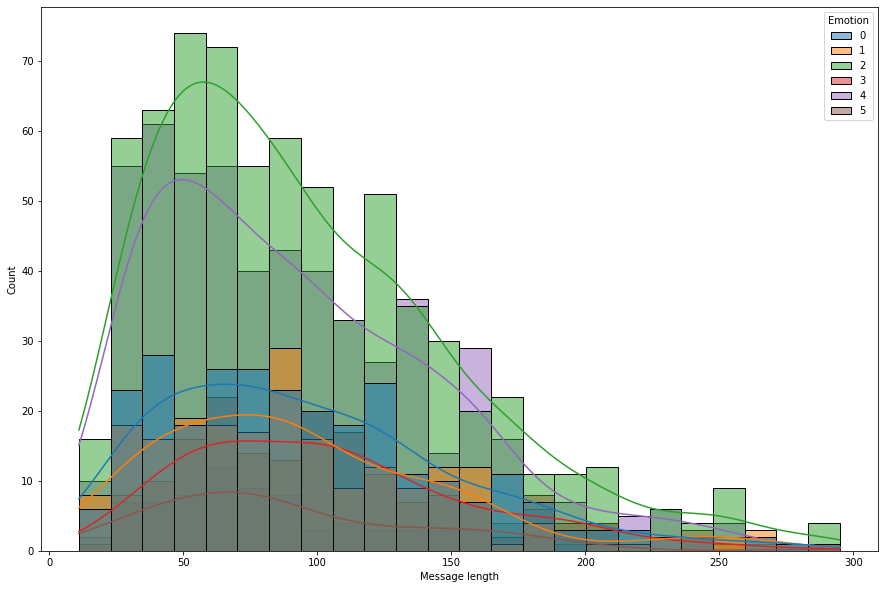

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_val, hue='Emotion', x='Message length', stat='count', multiple='layer', palette=palette,kde=True)

## Text Pre-processing


The objective now is to convert the messages in our datasets into numerical features which will allow us to use machine learning algorithms to perform classification. Bag-of-words approach will be used through CountVectorizer method from Scikit learn library. But first, we need to clean our messages by removing words which are not important in a way they are too common and won't help our algorithms to make good predictions, and also by removing punctuation.

In [673]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [642]:
def preprocess_message(message):
  STOPWORDS = stopwords.words('english')
  no_punc = [c for c in message if c not in string.punctuation]
  no_punc = ''.join(no_punc)
  words = [word for word in no_punc.split() if word not in STOPWORDS]
  return ' '.join(words)

In [643]:
df_train['Cleaned message'] = df_train['Message'].apply(lambda x: preprocess_message(x))
df_test['Cleaned message'] = df_test['Message'].apply(lambda x: preprocess_message(x))
df_val['Cleaned message'] = df_val['Message'].apply(lambda x: preprocess_message(x))

In [644]:
df_train.head()

,Message,Emotion,Message length,Cleaned message
0,i didnt feel humiliated,sadness,23,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,108,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,48,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,20,feeling grouchy


We can have an idea of the words which are the most used in the messages depending on the emotion, using Counter method from collections library :

In [650]:
from collections import Counter

words_counter = Counter()

words = df_train.loc[df_train['Emotion']=='anger', 'Cleaned message'].apply(lambda x: [word.lower() for word in x.split()])

for msg in words:
  words_counter.update(msg)

# Top 50 words observed in messages with Anger emotion
print(words_counter.most_common(50))

[('feel', 1459), ('feeling', 721), ('like', 384), ('im', 342), ('really', 124), ('get', 121), ('time', 118), ('know', 115), ('little', 105), ('people', 105), ('want', 98), ('even', 95), ('would', 89), ('angry', 85), ('way', 85), ('think', 81), ('things', 80), ('one', 79), ('could', 79), ('bit', 77), ('dont', 70), ('irritable', 70), ('still', 70), ('cold', 68), ('life', 66), ('something', 65), ('back', 64), ('cant', 64), ('greedy', 63), ('offended', 62), ('ive', 62), ('going', 61), ('bothered', 61), ('fucked', 60), ('resentful', 60), ('selfish', 59), ('irritated', 57), ('much', 56), ('make', 56), ('say', 56), ('annoyed', 56), ('violent', 55), ('cranky', 55), ('insulted', 55), ('hated', 55), ('mad', 55), ('dissatisfied', 54), ('dangerous', 54), ('frustrated', 53), ('rude', 53)]


Words which are the most used in all the messages :

In [651]:
words_counter = Counter()

words = df_train['Cleaned message'].apply(lambda x: [word.lower() for word in x.split()])

for msg in words:
  words_counter.update(msg)

# Top 50 words observed in messages with Anger emotion
print(words_counter.most_common(50))

[('feel', 11183), ('feeling', 5112), ('like', 2908), ('im', 2430), ('really', 942), ('know', 853), ('time', 794), ('get', 740), ('little', 736), ('people', 654), ('would', 646), ('want', 644), ('think', 596), ('one', 596), ('still', 595), ('ive', 587), ('even', 568), ('life', 551), ('make', 523), ('bit', 516), ('something', 513), ('love', 500), ('much', 496), ('going', 487), ('dont', 482), ('things', 480), ('way', 470), ('could', 453), ('day', 428), ('back', 403), ('go', 393), ('good', 393), ('pretty', 392), ('need', 387), ('always', 355), ('see', 355), ('right', 346), ('feelings', 343), ('also', 337), ('say', 333), ('today', 327), ('feels', 323), ('work', 322), ('around', 315), ('cant', 301), ('made', 296), ('well', 275), ('though', 274), ('didnt', 272), ('help', 272)]


We can also generate a Word Cloud which is a nice visual tool :

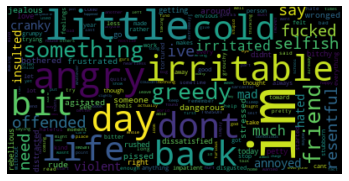

In [653]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Concatenate all the messages:
text = ' '.join(message for message in df_train.loc[df_train['Emotion']=='anger', 'Cleaned message'])

# Setting stopwords
stopwords = set(STOPWORDS)
stopwords.update(["feel", "feeling", "know","like","really","thing","make","want","even","going","one","think","time","still","way","things","people"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's generate another Word Cloud but this time gathering all the emotions :

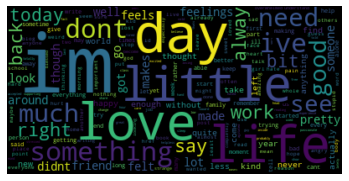

In [656]:
text = ' '.join(message for message in df_train['Cleaned message'])

stopwords = set(STOPWORDS)
stopwords.update(["feel", "feeling", "know","like","really","thing","make","want","even","going","one","think","time","still","way","things","people"])

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at the distribution of messages containing the same specific word can help us to decide whether or not we should add this word into the stopwords list :

In [657]:
df_train.loc[df_train['Cleaned message'].str.contains('feeling'), ['Emotion','Cleaned message']].groupby('Emotion').count()

,Cleaned message
Emotion,
anger,737
fear,753
joy,1592
love,415
sadness,1557
surprise,216


In [658]:
for i in df_train.loc[df_train['Cleaned message'].str.contains('feeling'), ['Emotion','Cleaned message']].groupby('Emotion').count()['Cleaned message']:
  print(i)

737
753
1592
415
1557
216


In [659]:
df_train.loc[df_train['Cleaned message'].str.contains('day'), ['Emotion','Cleaned message']].groupby('Emotion').count()

,Cleaned message
Emotion,
anger,142
fear,108
joy,423
love,72
sadness,368
surprise,35


In [660]:
df_train.loc[df_train['Cleaned message'].str.contains('little'), ['Emotion','Cleaned message']].groupby('Emotion').count()

,Cleaned message
Emotion,
anger,102
fear,144
joy,179
love,51
sadness,187
surprise,41


## Model Training & model selection

Now we can start building our model to perform classification.
Using CountVectorizer, we are going to convert a collection of text documents (our cleaned messages) to a matrix of token counts.

In [661]:
X_train = df_train['Cleaned message']
y_train = df_train['Emotion']

X_test = df_test['Cleaned message']
y_test = df_test['Emotion']

X_val = df_val['Cleaned message']
y_val = df_val['Emotion']

For the moment, let's instantiate a CountVectorizer object without defining the additional words we don't want to include in our model. Later, we are going to see how much we can improve our model by tuning it upstream, and including more stopwords is part of the process.

In [662]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_val_dtm = vect.transform(X_val)

In [663]:
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names()).head()

,aa,aaaaaaand,aaaaand,aaaand,aac,aahhh,aaron,ab,abandon,abandoned,abandoning,abandonment,abated,abbigail,abc,abdomen,abdominal,abducted,abelard,abhorrent,abide,abilities,ability,abit,able,ableness,abnormally,aboard,abominable,abortion,abou,abound,abraham,abroad,abruptly,absence,absolute,absolutely,absolutly,absorbed,...,yunhos,yup,yuuki,zach,zack,zackmdavis,zambia,zap,zara,zay,zayne,zealand,zen,zenden,zendikar,zenos,zero,zest,zhu,zico,zimbabwe,zimbabweans,zimmerman,zine,zipline,zoll,zombie,zombies,zone,zoned,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [664]:
pd.DataFrame(X_test_dtm.toarray(), columns=vect.get_feature_names()).head()

,aa,aaaaaaand,aaaaand,aaaand,aac,aahhh,aaron,ab,abandon,abandoned,abandoning,abandonment,abated,abbigail,abc,abdomen,abdominal,abducted,abelard,abhorrent,abide,abilities,ability,abit,able,ableness,abnormally,aboard,abominable,abortion,abou,abound,abraham,abroad,abruptly,absence,absolute,absolutely,absolutly,absorbed,...,yunhos,yup,yuuki,zach,zack,zackmdavis,zambia,zap,zara,zay,zayne,zealand,zen,zenden,zendikar,zenos,zero,zest,zhu,zico,zimbabwe,zimbabweans,zimmerman,zine,zipline,zoll,zombie,zombies,zone,zoned,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we import and instantiate a Multinomial Naive Bayes model, and we are going to feed it with the training document-term matrix we created one step before.

According to Sklearn's documentation, the multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

### Naive Bayes Model

In [665]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

y_train_pred = nb.predict(X_train_dtm)
y_test_pred = nb.predict(X_test_dtm)
y_val_pred = nb.predict(X_val_dtm)

print('---- Accuracy Before Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))
print('Validation accuracy', accuracy_score(y_val, y_val_pred))

---- Accuracy Before Tuning ----
Training accuracy 0.906375
Test accuracy 0.7895
Validation accuracy 0.788


Let's see how the model perform with additional stopwords. To do this, we are going to write a script which will automatically add the words (from X most common words, eg. 200) which exceed a certain number of occurrences (count threshold, eg. 20) in a certain number of emotions (exceed threshold, eg. 3). 

Just for example, if the word "like" appear more than 20 times in 3 different emotions, the script can add it the stopword list.

In [666]:
max_score = 0.5
val_accuracy_scores = []
most_common_ls = [185, 195, 205, 215, 225, 235, 245, 255]
exceed_threshold_ls = [3, 4]
count_threshold_ls = [10,11,12,13,14,15,16,17,18,19,20]
for mc in most_common_ls:
  for exc in exceed_threshold_ls:
    for cnt in count_threshold_ls:
      additional_stopwords = []
      for (i, j) in words_counter.most_common(mc):
        count_exceeded = [False]*6
        for id, count in enumerate(df_train.loc[df_train['Cleaned message'].str.contains(i), ['Emotion','Cleaned message']].groupby('Emotion').count()['Cleaned message']):
          if count > cnt:
            count_exceeded[id] = True
          if id == 5:
            if count_exceeded.count(True) >= exc:
              additional_stopwords += [i]
      vect = CountVectorizer(stop_words=additional_stopwords)
      X_train_dtm = vect.fit_transform(X_train)
      X_val_dtm = vect.transform(X_val)
      nb = MultinomialNB()
      nb.fit(X_train_dtm, y_train)
      y_val_pred = nb.predict(X_val_dtm)
      acc_score = accuracy_score(y_val, y_val_pred)
      if acc_score > max_score:
        max_score = acc_score
        best_most_common = mc
        best_exc = exc
        best_cnt = cnt

In [667]:
print(max_score)
print(best_most_common)
print(best_exc)
print(best_cnt)

0.832
215
3
16


Let's use the best hyperparameters we found:

In [668]:
additional_stopwords = []
for (i, j) in words_counter.most_common(225):
  count_exceeded = [False]*6
  for id, count in enumerate(df_train.loc[df_train['Cleaned message'].str.contains(i), ['Emotion','Cleaned message']].groupby('Emotion').count()['Cleaned message']):
    if count > 12:
      count_exceeded[id] = True
    if id == 5:
      if count_exceeded.count(True) >= 4:
        additional_stopwords += [i]

In [669]:
vect = CountVectorizer(stop_words=additional_stopwords)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_val_dtm = vect.transform(X_val)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

y_train_pred = nb.predict(X_train_dtm)
y_test_pred = nb.predict(X_test_dtm)
y_val_pred = nb.predict(X_val_dtm)

print('---- Accuracy After Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))
print('Validation accuracy', accuracy_score(y_val, y_val_pred))

---- Accuracy After Tuning ----
Training accuracy 0.9351875
Test accuracy 0.823
Validation accuracy 0.832


As we see, the script is working fine, we gained between 3 and 4% accuracy!

We can also do some improvments by tuning min_df :
- min_df: float in range [0.0, 1.0] or int, default=1
- When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
- If float, the parameter represents a proportion of documents.
- If integer, the parameter represents an absolute count.

In [670]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer(stop_words=additional_stopwords, min_df=10)),
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)

print('---- Accuracy After Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))
print('Validation accuracy', accuracy_score(y_val, y_val_pred))

---- Accuracy After Tuning ----
Training accuracy 0.9188125
Test accuracy 0.866
Validation accuracy 0.8695


Trying different values, we see that it's working good. We increased test and validation accuracies by 3 to 4%.

### Logistic Regression Model

From Sklearn documentation, Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [675]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('bow', CountVectorizer(stop_words=stopwords.words('english'))), 
                 ('model', LogisticRegression(solver='newton-cg', C=6))])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)

print('---- Accuracy After Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))
print('Validation accuracy', accuracy_score(y_val, y_val_pred))

---- Accuracy After Tuning ----
Training accuracy 0.995375
Test accuracy 0.8925
Validation accuracy 0.9005


Finally, we see that Logistic Regression model performs the best. We get an increase of accuracies from 3 to 8%.

We can save this model to be able to deploy it later.

In [706]:
import pickle

##saving the model
with open("pipe_log_reg.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out)
    f_out.close()

In [ ]:
pipe.predict_proba(["I feel like i'm loving you"])

array([[0.01187339, 0.00384238, 0.02680149, 0.94609178, 0.01031296,
        0.001078  ]])

In [699]:
pipe.predict_proba(["love"])

array([[0.14285806, 0.09008856, 0.07348533, 0.58355716, 0.09779101,
        0.01221989]])

if we want to improve our predictions regarding the word "love", we can give more influence to love class :

In [689]:
def reprocess_message(mess):
  message = [c for c in mess.split(' ') if c.lower() != 'love']
  message = ' '.join(message)
  return message

df_train.loc[df_train['Emotion'] != 'love','Cleaned message'] = df_train.loc[df_train['Emotion'] != 'love','Cleaned message'].apply(lambda x: reprocess_message(x))

In [690]:
X_train = df_train['Cleaned message']

In [691]:
pipe = Pipeline([('bow', CountVectorizer(stop_words=stopwords.words('english'))), 
                 ('model', LogisticRegression(solver='newton-cg', C=6))])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)

print('---- Accuracy After Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))
print('Validation accuracy', accuracy_score(y_val, y_val_pred))

---- Accuracy After Tuning ----
Training accuracy 0.995375
Test accuracy 0.8905
Validation accuracy 0.903


In [705]:
pipe.predict_proba(["I love you"])

array([[0.14285806, 0.09008856, 0.07348533, 0.58355716, 0.09779101,
        0.01221989]])

## Dealing with Imbalanced Data

We notice that some emotions are over represented in our datasets compare to others. For example, more than 50% of the messages are represented by Sadness and Joy. This kind of imbalance can be a problem for our models to make good predictions when it's about predicting classes that are under represented in our datasets : Here, it's the case for Surprise and Love which occupy less than 10% of the messages. Let's remind that the full dataset contains 20 000 records.

In [553]:
df = pd.concat([df_train, df_test, df_val])
df.reset_index(inplace=True, drop=True)
df.groupby('Emotion').describe()

Message                                                               
           count unique                                                top freq
Emotion                                                                        
anger       2709   2709                    i feel complimented or insulted    1
fear        2373   2373  i only have to think about a high school exper...    1
joy         6761   6760  i feel more adventurous willing to take risks ...    2
love        1641   1641  i tried to reconcile the two feelings into one...    1
sadness     5797   5797  i hold it for a day my arm will feel numb and ...    1
surprise     719    719  i admit to feeling bitterly surprised at how r...    1

In [554]:
df.shape

(20000, 2)

We are going to use the imblearn library which allow us to use some methods to perform Over sampling and Under sampling.

Let's perform under-sampling based on RandomUnderSampler method:

In [555]:
from imblearn.under_sampling import RandomUnderSampler

In [556]:
X = df[['Message']]
y = df['Emotion']

In [557]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X,y)
print(X_res.shape, y_res.shape)

(4314, 1) (4314,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [558]:
res_df = pd.DataFrame(np.concatenate((X_res,y_res.reshape(-1,1)),axis=1), columns=['Message','Emotion']) # Resampled Dataframe

In [562]:
print(res_df[(res_df['Emotion']=='sadness') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)
print(res_df[(res_df['Emotion']=='anger') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)
print(res_df[(res_df['Emotion']=='joy') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)
print(res_df[(res_df['Emotion']=='fear') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)
print(res_df[(res_df['Emotion']=='love') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)
print(res_df[(res_df['Emotion']=='suprise') & (res_df['Message'].str.contains(r'\bsad\b'))].shape)

print('-----')

print(res_df[(res_df['Emotion']=='surprise') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)
print(res_df[(res_df['Emotion']=='sadness') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)
print(res_df[(res_df['Emotion']=='joy') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)
print(res_df[(res_df['Emotion']=='love') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)
print(res_df[(res_df['Emotion']=='fear') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)
print(res_df[(res_df['Emotion']=='anger') & (res_df['Message'].str.contains(r'\bsurprise\b'))].shape)

print('-----')

print(res_df[(res_df['Emotion']=='love') & (res_df['Message'].str.contains(r'\blove\b'))].shape)
print(res_df[(res_df['Emotion']=='sadness') & (res_df['Message'].str.contains(r'\blove\b'))].shape)
print(res_df[(res_df['Emotion']=='anger') & (res_df['Message'].str.contains(r'\blove\b'))].shape)
print(res_df[(res_df['Emotion']=='surprise') & (res_df['Message'].str.contains(r'\blove\b'))].shape)
print(res_df[(res_df['Emotion']=='joy') & (res_df['Message'].str.contains(r'\blove\b'))].shape)
print(res_df[(res_df['Emotion']=='fear') & (res_df['Message'].str.contains(r'\blove\b'))].shape)

(12, 2)
(3, 2)
(0, 2)
(5, 2)
(3, 2)
(0, 2)
-----
(1, 2)
(0, 2)
(0, 2)
(0, 2)
(0, 2)
(0, 2)
-----
(45, 2)
(15, 2)
(18, 2)
(15, 2)
(17, 2)
(20, 2)


In [563]:
res_df.groupby('Emotion').describe()

Message                                                               
           count unique                                                top freq
Emotion                                                                        
anger        719    719                    i found myself feeling so angry    1
fear         719    719  i give you some tips on overcoming the feeling...    1
joy          719    719           i feel arsenal could be clearly superior    1
love         719    719  i was just telling you how i feel about you an...    1
sadness      719    719  i have a massive identity of my own and always...    1
surprise     719    719  i admit to feeling bitterly surprised at how r...    1

Here it is, all the emotions have now the same number of records, it means the dataset is perfectly balanced and logically no emotion will have much more influence than another when it will be time to make a prediction based on a new input message.

In [564]:
X = res_df['Message']
y = res_df['Emotion']

print(X.shape, y.shape)

(4314,) (4314,)


In [565]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [568]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score


pipe = Pipeline([('bow', CountVectorizer(stop_words=stopwords.words('english'))), 
                 ('model', LogisticRegression(solver='newton-cg', C=6))])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print('---- Accuracy After Tuning ----')
print('Training accuracy', accuracy_score(y_train, y_train_pred))
print('Test accuracy', accuracy_score(y_test, y_test_pred))

---- Accuracy After Tuning ----
Training accuracy 0.9982613735149232
Test accuracy 0.8621089223638471


In [576]:
print(pipe.predict(['']))

['love']


In [577]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(pipe, X, y, cv=5)
cv_results['test_score']

array([0.85168019, 0.85399768, 0.8400927 , 0.85283893, 0.84454756])

In [578]:
pd.DataFrame(pipe.named_steps['bow'].fit_transform(X_train).toarray(), columns=pipe.named_steps['bow'].get_feature_names())

,abandoned,abdominal,abhorrent,abilities,ability,able,abominable,abroad,absence,absolute,absolutely,abstract,abuse,abused,abuses,abusive,abyss,academic,academy,accept,acceptable,accepted,access,accessaries,accessories,accessory,accident,accidentally,accomplished,accomplishing,accomplishment,accomplishments,accord,according,account,acctually,accusation,accusing,accustomed,ache,...,yay,yeah,year,yearly,yearn,yearning,yearnings,yearns,years,yell,yelled,yes,yesterday,yesterdays,yet,yk,yo,yoga,york,youd,youll,young,younger,youre,youth,youtube,yummy,yunhos,yup,yuuki,zach,zealand,zero,zhuo,zombie,zombies,zone,zoo,zooms,zumba
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [593]:
from sklearn.model_selection import GridSearchCV
parameters = {'model__C':[5],            
              'model__solver':['liblinear'],
              'model__max_iter': [1000],
              'bow__min_df': np.arange(1,5,1),
              'bow__ngram_range': [(1,1),(1,2)],
              }
model = GridSearchCV(pipe, param_grid=parameters, cv=5, scoring='accuracy')

model.fit(X, y)
print("The best parameters by CV:", model.best_params_)
print("The best score by CV = {:5.3f}".format(model.best_score_))

The best parameters by CV: {'bow__min_df': 2, 'bow__ngram_range': (1, 2), 'model__C': 5, 'model__max_iter': 1000, 'model__solver': 'liblinear'}
The best score by CV = 0.854


In [170]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'bow', 'model', 'bow__analyzer', 'bow__binary', 'bow__decode_error', 'bow__dtype', 'bow__encoding', 'bow__input', 'bow__lowercase', 'bow__max_df', 'bow__max_features', 'bow__min_df', 'bow__ngram_range', 'bow__preprocessor', 'bow__stop_words', 'bow__strip_accents', 'bow__token_pattern', 'bow__tokenizer', 'bow__vocabulary', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [601]:
print(pipe.predict_proba(['love']))
print(model.predict_proba(['love']))

[[0.25591268 0.21662775 0.23657052 0.14711438 0.11878784 0.02498683]]
[[0.06960683 0.32915895 0.22877525 0.16212178 0.17764511 0.03269209]]


Finally, if we want to improve our predictions regarding the word "love", we can give more influence to love class :

In [606]:
def reprocess_message(mess):
  message = [c for c in mess.split(' ') if c.lower() != 'love']
  message = ' '.join(message)
  return message

res_df.loc[res_df['Emotion'] != 'love','Message'] = res_df.loc[res_df['Emotion'] != 'love','Message'].apply(lambda x: reprocess_message(x))

In [611]:
X = res_df['Message']
y = res_df['Emotion']

In [612]:
model = GridSearchCV(pipe, param_grid=parameters, cv=5, scoring='accuracy')

model.fit(X, y)
print("The best parameters by CV:", model.best_params_)
print("The best score by CV = {:5.3f}".format(model.best_score_))

The best parameters by CV: {'bow__min_df': 2, 'bow__ngram_range': (1, 2), 'model__C': 5, 'model__max_iter': 1000, 'model__solver': 'liblinear'}
The best score by CV = 0.855


In [684]:
model.predict(['love'])

array(['love'], dtype=object)

In [624]:
import pickle

##saving the model
with open("balanced_undersamp_pipe.pkl", 'wb') as f_out:
    pickle.dump(model, f_out)
    f_out.close()